<a href="https://colab.research.google.com/github/ArunVignesh75/ArunVignesh75/blob/main/salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SALARY PREDICTION


The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1.Sex. 1 for female, 0 for male.
2.Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3.Year. Number of years in current rank.
4.Degree. Highest degree. 1 for doctorate, 0 for master's.
5.YSdeg. Years since highest degree was earned.
6.Salary. Salary/year in dollars.
Tasks
Find the linear regression equation for this data using columns 1-5 to column 6.
Find the selection of columns with the best 
R
2
 score.
Report whether sex is a factor in salary

In [ ]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [ ]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [ ]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df.groupby('Sex')['Salary'].mean()

Sex
0    24696.789474
1    21357.142857
Name: Salary, dtype: float64

In [ ]:
df.groupby('Degree')['Salary'].mean()

Degree
0    24359.222222
1    23500.352941
Name: Salary, dtype: float64

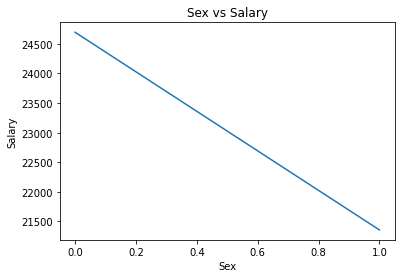

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [ ]:
df.groupby('Sex')['Salary'].mean().plot()
import matplotlib.pyplot as plt
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()
df[['Sex','Salary']].corr()

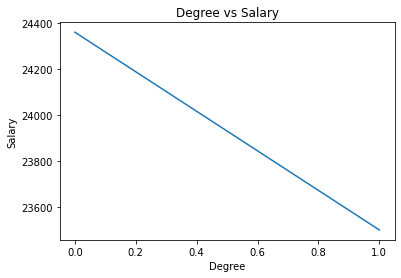

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
df.groupby('Degree')['Salary'].mean().plot()
import matplotlib.pyplot as plt
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
df[['Degree','Salary']].corr()

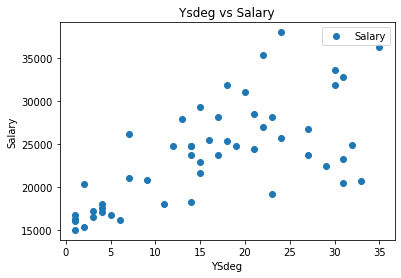

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [ ]:
df.plot(x='YSdeg', y='Salary', style='o')
plt.title('Ysdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()
df[['YSdeg','Salary']].corr()

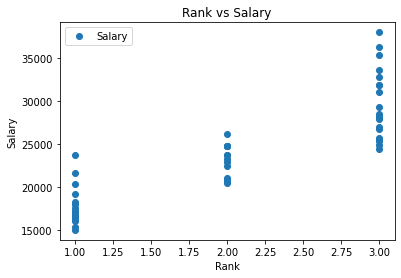

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [ ]:
df.plot(x='Rank', y='Salary', style='o')
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()
df[['Rank','Salary']].corr()

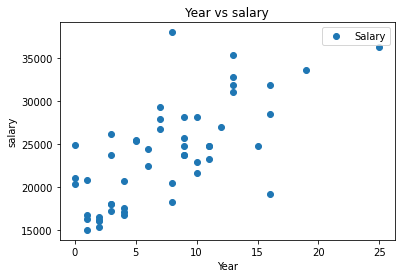

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [ ]:
df.plot(x='Year', y='Salary', style='o')
plt.title('Year vs salary')
plt.xlabel('Year')
plt.ylabel('salary')
plt.show()
df[['Year','Salary']].corr()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [ ]:
X = df[['Sex', 'Rank', 'Year', 'YSdeg']].values #array of features
y = df['Salary'].values #array of targets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank',
       'Year', 'YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df


,Coefficient
Sex,520.488840
Rank,4742.030287
Year,2478.594519
YSdeg,-644.681047


In [ ]:
regressor.intercept_ # c 

23655.90243902439

In [ ]:
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dff

,Actual,Predicted
0,26182,21677.942288
1,17095,16839.395140
2,24750,26334.281234
3,22450,22815.872238
4,28200,29312.794047
5,21600,20003.589612
6,18075,16389.782625
7,23713,18471.615016
8,24800,24843.752522
9,33696,32928.216798


In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.684991379008109


In [ ]:
regressor.predict([[1,3,1,32]])

array([20251.28315893])